<a href="https://colab.research.google.com/github/sbh69840/Machine-hack-predict-salary/blob/master/auto_sklearn_plant_or_soil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Code to mount google drive
from google.colab import drive
drive.mount('/content/gdrive')
#Before this upload the data folder on your GDrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

for _ in range(3):
    try:
        import autosklearn.classification
        break
    except:
        pass
else:
    raise ImportError("failed to import from autosklearn")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,264 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (Th

In [0]:
import autosklearn.classification

In [0]:
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
TRAIN_DIR = '/content/gdrive/My Drive/data/train/'
TEST_DIR = '/content/gdrive/My Drive/data/test/'

ROWS = 128
COLS = 128
CHANNELS = 3

train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]

print(train_images)


def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)


def prep_data(images):
    
    m = len(images)
    n_x = ROWS * COLS * CHANNELS
    
    X = np.ndarray((n_x, m), dtype=np.uint8)
    y = np.zeros((1, m))
    print ("X shape is {}".format(X.shape))
    
    for i, image_file in enumerate(images):
        image = read_image(image_file)
        X[:, i] = np.squeeze(image.reshape((n_x, 1)))
        if 'plant' in image_file.lower():
            y[0, i] = 1
        elif 'soil' in image_file.lower():
            y[0, i] = 0
        else:
            y[0, i] = image_file.split('/')[-1].split('.')[0]
        if i%10 == 0: print('Done {} of {}'.format(i, m))
    
    return X, y

X_train, y_train = prep_data(train_images)
X_test, test_idx = prep_data(test_images)

print("Train shape: {}".format(X_train.shape))
print("Test shape: {}".format(X_test.shape))

['/content/gdrive/My Drive/data/train/plant_100_.jpg', '/content/gdrive/My Drive/data/train/plant_103_.jpg', '/content/gdrive/My Drive/data/train/plant_101_.jpg', '/content/gdrive/My Drive/data/train/plant_0_.jpg', '/content/gdrive/My Drive/data/train/plant_106_.jpg', '/content/gdrive/My Drive/data/train/plant_102_.jpg', '/content/gdrive/My Drive/data/train/plant_104_.jpg', '/content/gdrive/My Drive/data/train/plant_105_.jpg', '/content/gdrive/My Drive/data/train/plant_107_.jpg', '/content/gdrive/My Drive/data/train/plant_144_.jpg', '/content/gdrive/My Drive/data/train/plant_109_.jpg', '/content/gdrive/My Drive/data/train/plant_108_.jpg', '/content/gdrive/My Drive/data/train/plant_10_.jpg', '/content/gdrive/My Drive/data/train/plant_118_.jpg', '/content/gdrive/My Drive/data/train/plant_110_.jpg', '/content/gdrive/My Drive/data/train/plant_113_.jpg', '/content/gdrive/My Drive/data/train/plant_115_.jpg', '/content/gdrive/My Drive/data/train/plant_117_.jpg', '/content/gdrive/My Drive/data

In [0]:
classes = {0:'soil',
           1:'plant'}
def show_image(X, y, idx):
    image = X[idx]
    image = image.reshape((ROWS, COLS, CHANNELS))
    plt.figure(figsize=(4,2))
    plt.imshow(image)
    plt.title("This is a {}".format(classes[y[idx,0]]))
    plt.show()
    
def show_image_prediction(X, idx, model):
    image = X[idx].reshape(1, -1)
    image_class = classes[model.predict(image).item()]
    image = image.reshape((ROWS, COLS, CHANNELS))
    plt.figure(figsize=(4,2))
    plt.imshow(image)
    plt.title("Test {}: I think this is {}".format(idx, image_class))
    plt.show()

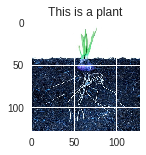

In [11]:
show_image(X_train.T, y_train.T, 1)

# Auto sklearn

In [15]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
#import autosklearn.classification
#clf = LogisticRegressionCV(max_iter=10000)
#RFC is better than LRCV
#Let's also try automl

#clf = RandomForestClassifier(n_estimators=1000)

clf = autosklearn.classification.AutoSklearnClassifier()

# from tpot import TPOTClassifier

# tpot = TPOTClassifier(generations=5,n_jobs=-1, population_size=20, verbosity=2)
X_train_lr, y_train_lr = X_train.T, y_train.T.ravel()
# tpot.fit(X_train_lr, y_train_lr)

# tpot.export('tpot_mnist_pipeline.py')

clf.fit(X_train_lr, y_train_lr)

/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-02-10 17:57:42,914:EnsembleBuilder(1):a2ba58ba82a42f716a11427b06a41c3d] No models better than random - using Dummy Score!
[WARNING] [2019-02-10 17:57:42,933:EnsembleBuilder(1):a2ba58ba82a42f716a11427b06a41c3d] No models better than random - using Dummy Score!
[WARNING] [2019-02-10 17:57:44,939:EnsembleBuilder(1):a2ba58ba82a42f716a11427b06a41c3d] No models better than random - using Dummy Score!
[WARNING] [2019-02-10 17:57:46,959:EnsembleBuilder(1):a2ba58ba82a42f716a11427b06a41c3d] No models better than random - using Dummy Score!
[WARNING] [2019-02-10 17:57:48,966:EnsembleBuilder(1):a2ba58ba82a42f716a11427b06a41c3d] No models better than random - using Dummy Score!
[WARNING] [2019-02-10 17:57:50,977:EnsembleBuilder(1):a2ba58ba82a42f716a11427b06a41c3d] No models better than random - using Dummy Score!
[WARNING] [2019-02-10 17:57:52,995:EnsembleBuilder(1):a2ba58ba82a42f716a11427b06a41c3d] No models better than random - using Dummy Score!
[WARNING] [2019-02-10 17:57:55,012

/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

AutoSklearnClassifier(delete_output_folder_after_terminate=True,
           delete_tmp_folder_after_terminate=True,
           disable_evaluator_output=False, ensemble_memory_limit=1024,
           ensemble_nbest=50, ensemble_size=50, exclude_estimators=None,
           exclude_preprocessors=None, get_smac_object_callback=None,
           include_estimators=None, include_preprocessors=None,
           initial_configurations_via_metalearning=25, logging_config=None,
           ml_memory_limit=3072, n_jobs=None, output_folder=None,
           per_run_time_limit=360, resampling_strategy='holdout',
           resampling_strategy_arguments=None, seed=1, shared_mode=False,
           smac_scenario_args=None, time_left_for_this_task=3600,
           tmp_folder=None)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Model accuracy: 93.28%
Confusion matrix, without normalization
[[291  20]
 [ 23 306]]


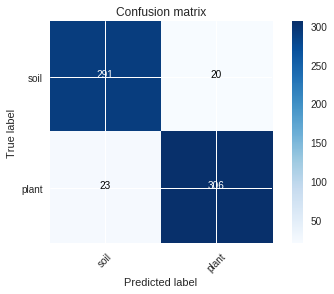

In [17]:
print("Model accuracy: {:.2f}%".format(clf.score(X_train_lr, y_train_lr)*100))
plot_confusion_matrix(confusion_matrix(y_train_lr, clf.predict(X_train_lr)), ['soil', 'plant'])

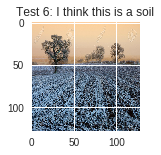

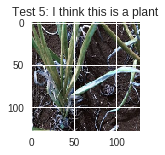

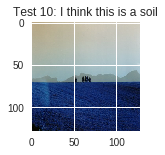

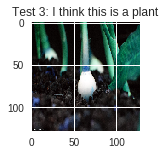

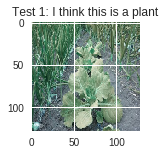

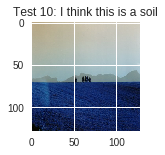

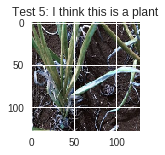

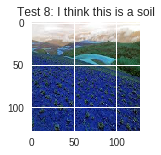

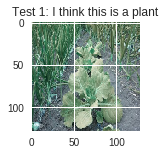

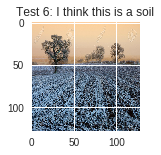

In [18]:
X_test_lr, test_idx = X_test.T, test_idx.T
for i in np.random.randint(0, len(X_test_lr), 10):
    show_image_prediction(X_test_lr, i, clf)

In [0]:
submission = pd.DataFrame(np.hstack([test_idx, clf.predict_proba(X_test_lr)]), columns=['id', 'soil', 'plant'])

In [0]:
submission['id'] = submission['id'].astype(int)
submission.sort_values('id', inplace=True)

In [21]:
submission.head(12)

,id,soil,plant
0,0,0.455848,0.544152
6,0,0.630507,0.369493
7,0,0.674456,0.325544
8,0,0.724118,0.275882
9,0,0.583107,0.416893
10,0,0.721855,0.278145
1,1,0.363857,0.636143
2,1,0.507612,0.492388
3,1,0.385245,0.614755
4,1,0.599041,0.400959


In [0]:
submission.to_csv('soil_plant.csv', index=False)